In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

In [3]:
# input files/dirs
MUTATION_DENSITY_FRACTION = "../results/mutation_density_fractions"
MUTATION_DENSITY_GENIC_REGIONS = "../results/mutation_density_genic_regions"

## Passenger mutation density by genic region

In [4]:
files = os.listdir(MUTATION_DENSITY_FRACTION)
files = [f for f in files if f.endswith(".tsv") and "promoter" not in f]
print(files)
all_mut_density_fractions = []
for file in files:
    cancer_type = file.split(".")[0]
    df = pd.read_csv(f"{MUTATION_DENSITY_FRACTION}/{file}", sep="\t")
    # create dictionary with region as key and fraction as value
    cancer_data = {"cancer_type": cancer_type}
    for index, row in df.iterrows():
        cancer_data[row["genic_region"]] = row["fraction"]
    all_mut_density_fractions.append(cancer_data)
all_mut_density_fractions_df = pd.DataFrame(all_mut_density_fractions)
all_mut_density_fractions_df.set_index("cancer_type", inplace=True)
all_mut_density_fractions_df.sort_index(inplace=True)
all_mut_density_fractions_df = all_mut_density_fractions_df.T
regions = ["UTR5", "UTR3", "intronic", "exonic", "upstream", "downstream", "ncRNA"]
all_mut_density_fractions_df = all_mut_density_fractions_df.loc[regions]
all_mut_density_fractions_df

['CNS-Oligo.tsv', 'Kidney-ChRCC.tsv', 'Prost-AdenoCA.tsv', 'Kidney-RCC.tsv', 'Stomach-AdenoCA.tsv', 'CNS-Medullo.tsv', 'Thy-AdenoCA.tsv', 'Myeloid-MPN.tsv', 'Bone-Leiomyo.tsv', 'Lymph-BNHL.tsv', 'Myeloid-AML.tsv', 'Lung-AdenoCA.tsv', 'CNS-GBM.tsv', 'Head-SCC.tsv', 'Breast-AdenoCa.tsv', 'Ovary-AdenoCA.tsv', 'CNS-PiloAstro.tsv', 'Cervix-SCC.tsv', 'Liver-HCC.tsv', 'Bone-Osteosarc.tsv', 'Biliary-AdenoCA.tsv', 'Skin-Melanoma.tsv', 'Lung-SCC.tsv', 'Lymph-CLL.tsv', 'Panc-Endocrine.tsv', 'Bladder-TCC.tsv', 'Panc-AdenoCA.tsv', 'ColoRect-AdenoCA.tsv', 'Breast-LobularCa.tsv', 'Eso-AdenoCa.tsv', 'Uterus-AdenoCA.tsv']


cancer_type,Biliary-AdenoCA,Bladder-TCC,Bone-Leiomyo,Bone-Osteosarc,Breast-AdenoCa,Breast-LobularCa,CNS-GBM,CNS-Medullo,CNS-Oligo,CNS-PiloAstro,...,Myeloid-AML,Myeloid-MPN,Ovary-AdenoCA,Panc-AdenoCA,Panc-Endocrine,Prost-AdenoCA,Skin-Melanoma,Stomach-AdenoCA,Thy-AdenoCA,Uterus-AdenoCA
UTR5,NaN,0.933565,1.0,NaN,0.435832,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.422451,NaN,NaN,1.000000,0.139718,NaN,1.000000
UTR3,0.219381,1.000000,1.0,NaN,0.382172,NaN,0.594311,1.000000,NaN,NaN,...,1.0,NaN,0.874091,0.617678,NaN,0.449199,0.730221,0.879013,NaN,0.621446
intronic,0.793382,0.281988,1.0,0.967054,0.394602,1.0,0.184199,0.091730,1.0,0.168848,...,1.0,1.0,0.311932,0.399997,0.967551,0.432122,0.683672,0.212518,0.588747,0.231277
exonic,1.000000,0.424143,1.0,1.000000,0.930371,1.0,0.549306,0.556601,NaN,1.000000,...,1.0,1.0,0.969394,0.882426,0.765138,1.000000,0.765306,0.445327,1.000000,0.970169
upstream,NaN,0.570374,1.0,NaN,1.000000,NaN,0.015013,NaN,NaN,NaN,...,NaN,NaN,1.000000,1.000000,NaN,1.000000,0.111151,0.492897,NaN,0.000000
downstream,0.093750,0.203126,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN,NaN,...,NaN,NaN,1.000000,0.814469,NaN,1.000000,0.744809,0.338720,NaN,0.508368
ncRNA,1.000000,1.000000,NaN,NaN,0.921612,NaN,0.194357,1.000000,NaN,NaN,...,NaN,1.0,1.000000,0.918239,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


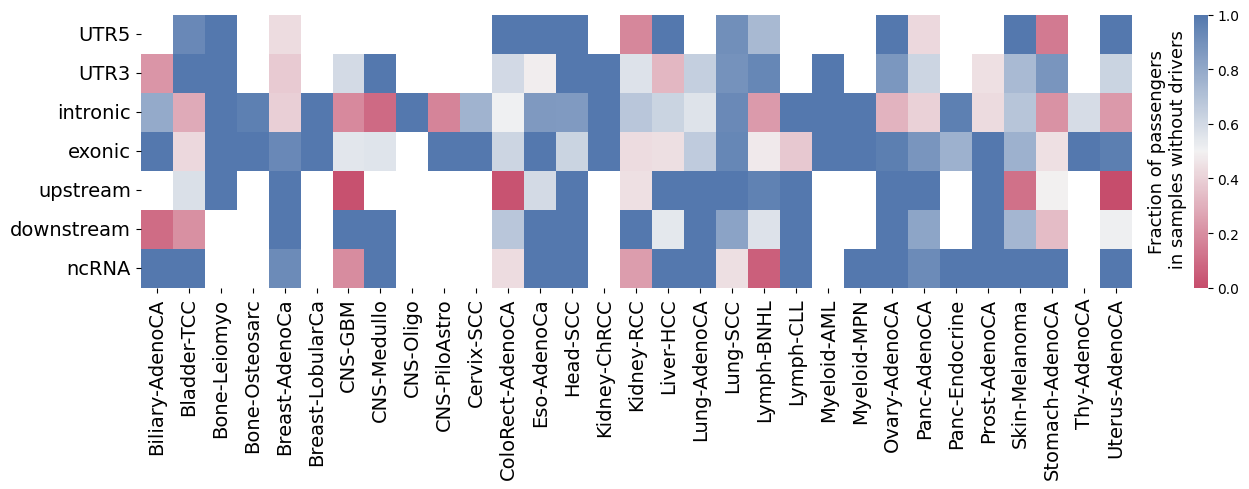

In [5]:
# Passenger mutation density in samples without driver mutations as a fraction of Passenger mutation density in all samples
plt.figure(figsize=(14, 5))
ax = sns.heatmap(
    all_mut_density_fractions_df,
    cmap=sns.diverging_palette(0, 250, 60, 50, as_cmap=True),
)

# colorbar label
cbar = ax.collections[0].colorbar
cbar.set_label("Fraction of passengers\n in samples without drivers", fontsize=13, labelpad=5)
cbar.ax.yaxis.set_label_position("left")

# x-axis labels
xticklabels = ax.get_xticklabels()
ax.set_xticklabels([x.get_text().replace("_", "/") for x in xticklabels])
plt.xlabel("")
plt.xticks(fontsize=14)

# plt.ylabel("Genic Region", fontsize=11, labelpad=10)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()

In [6]:
files = os.listdir(MUTATION_DENSITY_GENIC_REGIONS)
files = [f for f in files if f.endswith(".tsv") and "promoter" not in f]
print(files)

mut_genic_df = pd.DataFrame()
for f in files:
	df = pd.read_csv(f"{MUTATION_DENSITY_GENIC_REGIONS}/{f}", sep="\t")
	df["cancer_type"] = f.split(".")[0]
	mut_genic_df = pd.concat([mut_genic_df, df])
mut_genic_df.reset_index(drop=True, inplace=True)
print(mut_genic_df.shape)

mut_genic_df["passenger_density_log"] = np.log10(mut_genic_df["adj_passenger_density"] + 1)
print(mut_genic_df.shape)
mut_genic_df.head()

['CNS-Oligo.tsv', 'Kidney-ChRCC.tsv', 'Prost-AdenoCA.tsv', 'Kidney-RCC.tsv', 'Stomach-AdenoCA.tsv', 'CNS-Medullo.tsv', 'Thy-AdenoCA.tsv', 'Myeloid-MPN.tsv', 'Bone-Leiomyo.tsv', 'Lymph-BNHL.tsv', 'Myeloid-AML.tsv', 'Lung-AdenoCA.tsv', 'CNS-GBM.tsv', 'Head-SCC.tsv', 'Breast-AdenoCa.tsv', 'Ovary-AdenoCA.tsv', 'CNS-PiloAstro.tsv', 'Cervix-SCC.tsv', 'Liver-HCC.tsv', 'Bone-Osteosarc.tsv', 'Biliary-AdenoCA.tsv', 'Skin-Melanoma.tsv', 'Lung-SCC.tsv', 'Lymph-CLL.tsv', 'Panc-Endocrine.tsv', 'Bladder-TCC.tsv', 'Panc-AdenoCA.tsv', 'ColoRect-AdenoCA.tsv', 'Breast-LobularCa.tsv', 'Eso-AdenoCa.tsv', 'Uterus-AdenoCA.tsv']
(197712, 6)
(197712, 7)


,Tumor_Sample_Barcode,gene,has_driver,genic_region,adj_passenger_density,cancer_type,passenger_density_log
0,00493087-9d9d-40ca-86d5-936f1b951c93,CIC,True,exonic,0.0,CNS-Oligo,0.0
1,00493087-9d9d-40ca-86d5-936f1b951c93,FUBP1,True,exonic,0.0,CNS-Oligo,0.0
2,00493087-9d9d-40ca-86d5-936f1b951c93,IDH1,True,exonic,0.0,CNS-Oligo,0.0
3,2aeaab9f-4459-4be8-91e7-e0746cbd671c,IDH1,True,exonic,0.0,CNS-Oligo,0.0
4,2aeaab9f-4459-4be8-91e7-e0746cbd671c,TP53,True,exonic,0.0,CNS-Oligo,0.0


[(('UTR5', True), ('UTR5', False)), (('UTR3', True), ('UTR3', False)), (('intronic', True), ('intronic', False)), (('exonic', True), ('exonic', False)), (('upstream', True), ('upstream', False)), (('downstream', True), ('downstream', False)), (('ncRNA', True), ('ncRNA', False))]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

intronic_True vs. intronic_False: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:7.905e-47 U_stat=2.905e+07
exonic_True vs. exonic_False: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:6.882e-06 U_stat=3.259e+07
ncRNA_True vs. ncRNA_False: Mann-Whitney-Wilcoxon test smaller w

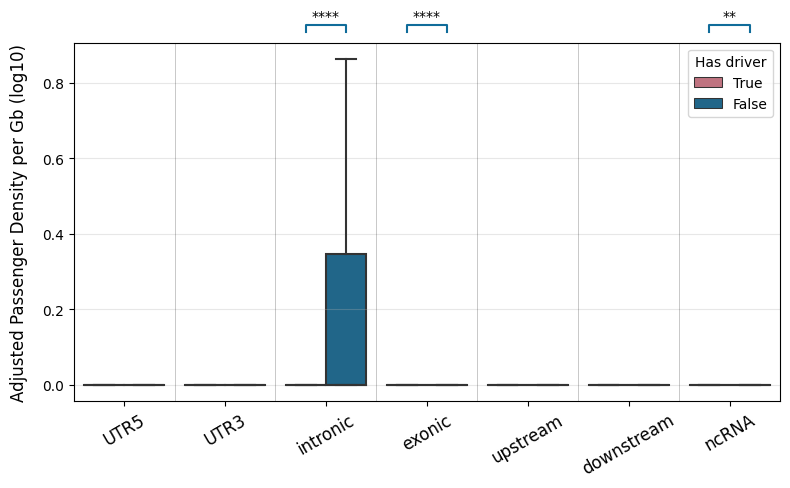

In [7]:
plt.figure(figsize=(8, 5))
colors = ["#CC6677", "#106C9A", "#529267"]
cmap = sns.color_palette(colors)
ax = sns.boxplot(
    x="genic_region",
	y="passenger_density_log",
	hue="has_driver",
	data=mut_genic_df,
    order=regions,
    hue_order=[True, False],
    palette=cmap,
    showfliers=False,
)

# add grid lines
ax.grid(axis='y', alpha=0.3)
for i in range(len(regions) - 1):
	ax.axvline(i + 0.5, color='black', lw=0.5, alpha=0.3)

# add statistical significance annotations
box_pairs = []
for region in regions:
    region_data = mut_genic_df[mut_genic_df["genic_region"] == region]
    if len(region_data["has_driver"].unique().tolist()) == 2:
        box_pairs.append(((region, True), (region, False)))
print(box_pairs)

annotator = Annotator(
    ax, 
    data=mut_genic_df,
    x="genic_region",
    y="passenger_density_log", 
    hue="has_driver",
    order=regions,
    hue_order=[True, False],
    pairs=box_pairs,
)
annotator.configure(test='Mann-Whitney-gt', text_format='star', loc='outside', hide_non_significant=True, color=colors[0])
annotator.configure(comparisons_correction="fdr_bh", verbose=2)
annotator.apply_test().annotate()
annotator.configure(test='Mann-Whitney-ls', text_format='star', loc='outside', hide_non_significant=True, color=colors[1])
annotator.configure(comparisons_correction="fdr_bh", verbose=2)
annotator.apply_test().annotate()

plt.xlabel("", fontsize=12, labelpad=10)
plt.xticks(rotation=30, fontsize=12)
plt.ylabel("Adjusted Passenger Density per Gb (log10)", fontsize=12, labelpad=10)
plt.legend(title="Has driver", fontsize=10, title_fontsize=10)
plt.tight_layout()

In [10]:
mut_genic_df_mean = mut_genic_df.groupby(["genic_region", "has_driver"]).mean().reset_index()
mut_genic_df_mean

/var/folders/1r/lnpzqmmd429dz0fv3s3z1hdh0000gr/T/ipykernel_69998/416976945.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mut_genic_df_mean = mut_genic_df.groupby(["genic_region", "has_driver"]).mean().reset_index()


,genic_region,has_driver,adj_passenger_density,passenger_density_log
0,-,False,NaN,NaN
1,-,True,NaN,NaN
2,UTR3,False,6.318840,0.025539
3,UTR3,True,2.666949,0.025589
4,UTR5,False,131.181997,0.016440
5,UTR5,True,52.365507,0.013181
6,downstream,False,5.068869,0.012846
7,downstream,True,0.940418,0.010763
8,exonic,False,61.947814,0.070882
9,exonic,True,12.861514,0.044140


['intronic', 'exonic', 'ncRNA', 'UTR3', 'UTR5', 'upstream', 'downstream']
[(('UTR5', True), ('UTR5', False)), (('UTR3', True), ('UTR3', False)), (('intronic', True), ('intronic', False)), (('exonic', True), ('exonic', False)), (('upstream', True), ('upstream', False)), (('downstream', True), ('downstream', False)), (('ncRNA', True), ('ncRNA', False))]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

exonic_True vs. exonic_False: t-test independent samples with Benjamini-Hochberg correction, P_val:1.975e-04 t=-3.723e+00
intronic_True vs. intronic_False: t-test independent samples with Benjamini-Hochberg correction, P_val:1.097e-20 t=-9.335e+00
ncRNA_True vs. ncRNA_False: t-test independent samples with Benjamini-Hochberg correction, P_val:1.452e-02 t=-2.444e+00


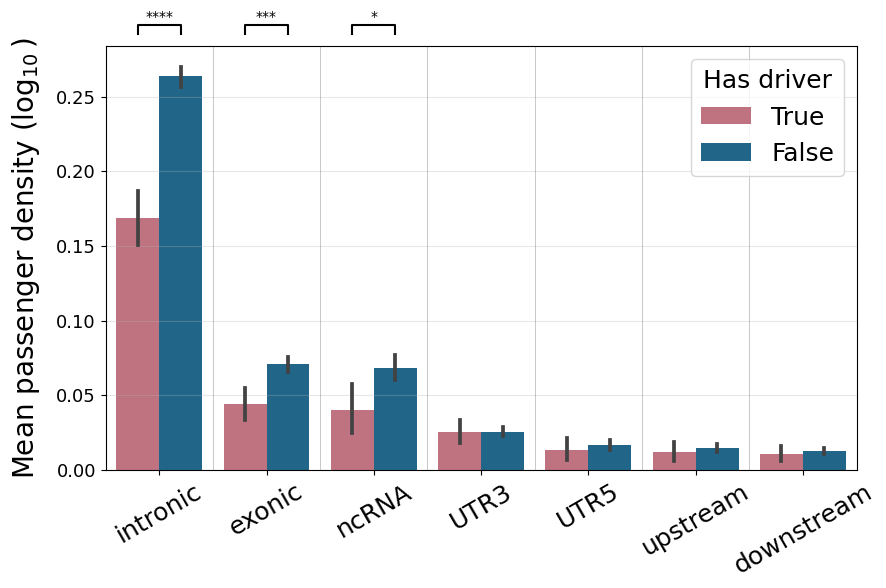

In [12]:
plt.figure(figsize=(9, 6))
colors = ["#CC6677", "#106C9A", "#529267"]
cmap = sns.color_palette(colors)

# sort genic region by mean passenger density
mean_values = mut_genic_df.groupby(["genic_region"])["passenger_density_log"].mean().reset_index()
mean_values.sort_values(by="passenger_density_log", ascending=False, inplace=True)
mean_values_order = mean_values["genic_region"].tolist()
mean_values_order.remove("-")
mean_values_order.remove("splicing")
print(mean_values_order)

ax = sns.barplot(
    x="genic_region",
	y="passenger_density_log",
	hue="has_driver",
	data=mut_genic_df,
    order=mean_values_order,
    hue_order=[True, False],
    palette=cmap,
)

# add grid lines
ax.grid(axis='y', alpha=0.3)
for i in range(len(mean_values_order) - 1):
	ax.axvline(i + 0.5, color='black', lw=0.5, alpha=0.3)

# add statistical significance annotations
box_pairs = []
for region in regions:
    region_data = mut_genic_df[mut_genic_df["genic_region"] == region]
    if len(region_data["has_driver"].unique().tolist()) == 2:
        box_pairs.append(((region, True), (region, False)))
print(box_pairs)

annotator = Annotator(
    ax, 
    data=mut_genic_df,
    x="genic_region",
    y="passenger_density_log", 
    hue="has_driver",
    order=mean_values_order,
    hue_order=[True, False],
    pairs=box_pairs,
)
annotator.configure(test='t-test_ind', text_format='star', loc='outside', hide_non_significant=True, color='black')
annotator.configure(comparisons_correction="fdr_bh", verbose=2)
annotator.apply_test().annotate()

plt.xlabel("")
plt.xticks(rotation=30, fontsize=18)
plt.yticks(fontsize=13)
plt.ylabel(r"Mean passenger density ($\log_{10}$)", fontsize=20, labelpad=10)
plt.legend(title="Has driver", fontsize=18, title_fontsize=18)
plt.tight_layout()